In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
titanic = pd.read_csv('/home/alimou/Desktop/data_challenge/data_callenge_titanic/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exploratory

<Axes: >

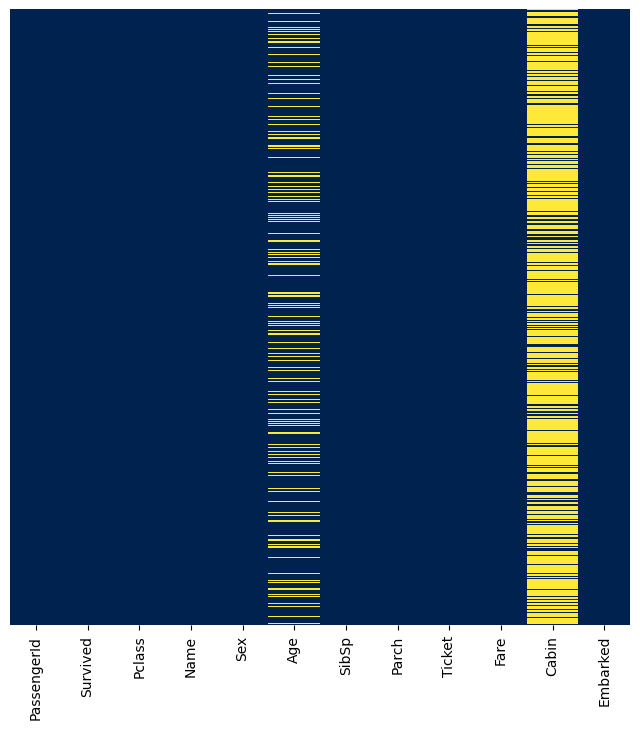

In [21]:
plt.figure(figsize=(8,8))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='cividis')

<Axes: xlabel='Survived', ylabel='count'>

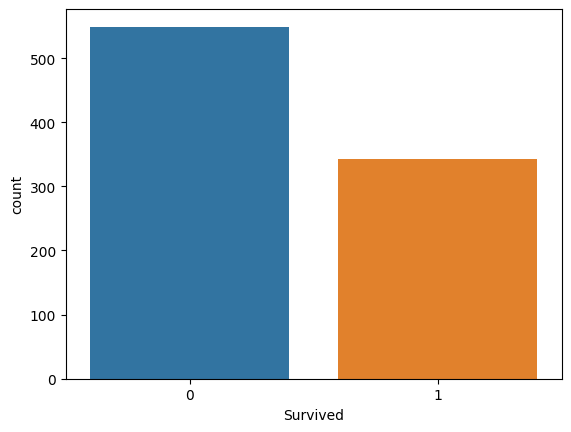

In [22]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

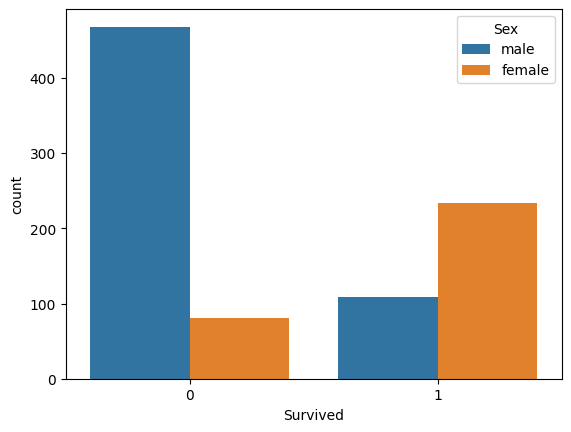

In [26]:
sns.countplot(x='Survived', hue='Sex' ,data=titanic)

Cleaning

In [28]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [32]:
def calcul_age(cols):
    age_map = [38,30,25]
    age, pclass = cols[0], cols[1]
    
    if pd.isnull(age):
        return age_map[int(pclass - 1)]
    else:
        return age

In [33]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(calcul_age, axis=1) 

<Axes: >

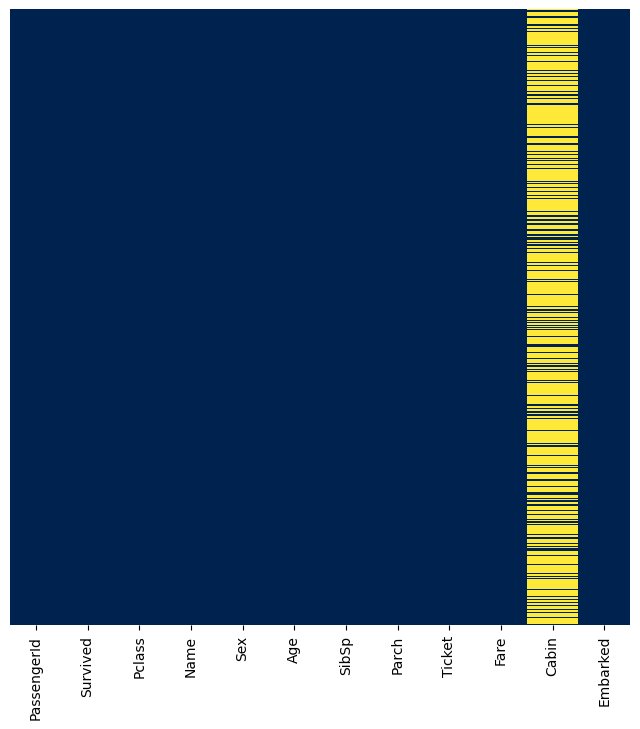

In [34]:
plt.figure(figsize=(8,8))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [47]:
 #itanic.drop('Cabin', axis=1 ,inplace=True)


In [45]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

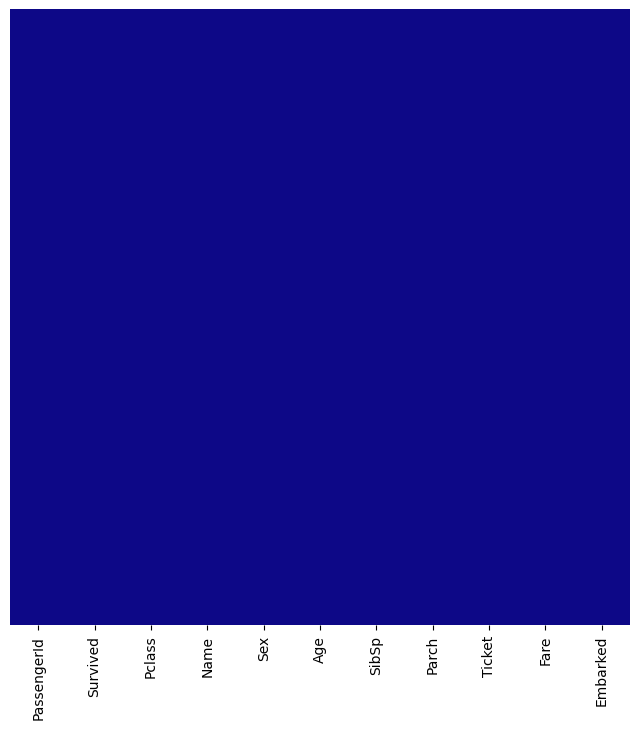

In [50]:
plt.figure(figsize=(8,8))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Feature Engineering

In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
Gender = pd.get_dummies(titanic['Sex'], drop_first=True)

In [54]:
Gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [55]:
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [56]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')
sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [57]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')
parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


Combine all the features

In [59]:
titanic = titanic.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch',
                       'Ticket', 'Embarked'], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


concatenation

In [61]:
titanic = pd.concat([titanic, Gender, embark, sibsp, parch], axis=1)

titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
titanic.to_csv('titanic_clean.csv', index=False)